## **Correlação de Indicadores Macroeconômicos**

#### Este notebook apresenta o índice de correlação de cinco indicadores macroeconômicos: Risco-Brasil, Produto Interno Bruto (PIB), Taxa de Câmbio (reais por dólar), Selic Overnight e Inflação (IPCA).

In [1]:
# Importar packages
from DadosAbertosBrasil import ipea
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### 1. Capturar dados

In [2]:
indicadores = {'Risco-Brasil': 'JPM366_EMBI366',
               'PIB': 'BM12_PIB12',
               'Dólar': 'BM12_ERC12',
               'Selic Over': 'BM12_TJOVER12',
               'IPCA': 'PRECOS12_IPCAG12'}

dados = {}
for indicador in indicadores:
    serie = ipea.series(indicadores[indicador])
    serie.VALDATA = pd.to_datetime(serie.VALDATA.str[:-6])
    serie = serie.loc[(serie.VALDATA >= '2000-01-01') & (serie.VALDATA < '2020-01-01'), ['VALDATA', 'VALVALOR']]
    serie.set_index(serie.VALDATA, inplace=True)
    serie = serie.resample('M').last().VALVALOR
    dados[indicador] = list(serie)
    
df = pd.DataFrame(dados, index=serie.index)
df.tail(10)

,Risco-Brasil,PIB,Dólar,Selic Over,IPCA
VALDATA,,,,,
2019-03-31,253.0,579215.0,3.845884,0.47,0.75
2019-04-30,252.0,592917.0,3.895557,0.52,0.57
2019-05-31,274.0,604564.2,4.000918,0.54,0.13
2019-06-30,239.0,598324.7,3.858226,0.47,0.01
2019-07-31,212.0,627065.0,3.778713,0.57,0.19
2019-08-31,248.0,616114.9,4.019382,0.50,0.11
2019-09-30,247.0,599519.6,4.120900,0.46,-0.04
2019-10-31,240.0,628347.5,4.086387,0.48,0.10
2019-11-30,239.0,624631.4,4.154725,0.38,0.51


#### 2. Plottar matriz de correlação

In [3]:
df.corr().style.background_gradient(cmap='coolwarm')

,Risco-Brasil,PIB,Dólar,Selic Over,IPCA
Risco-Brasil,1,-0.545009,0.220421,0.653741,0.417272
PIB,-0.545009,1,0.476705,-0.737031,-0.173792
Dólar,0.220421,0.476705,1,-0.0251788,0.148294
Selic Over,0.653741,-0.737031,-0.0251788,1,0.277981
IPCA,0.417272,-0.173792,0.148294,0.277981,1


#### 3. Plottar gráficos de timeline dos indicadores

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


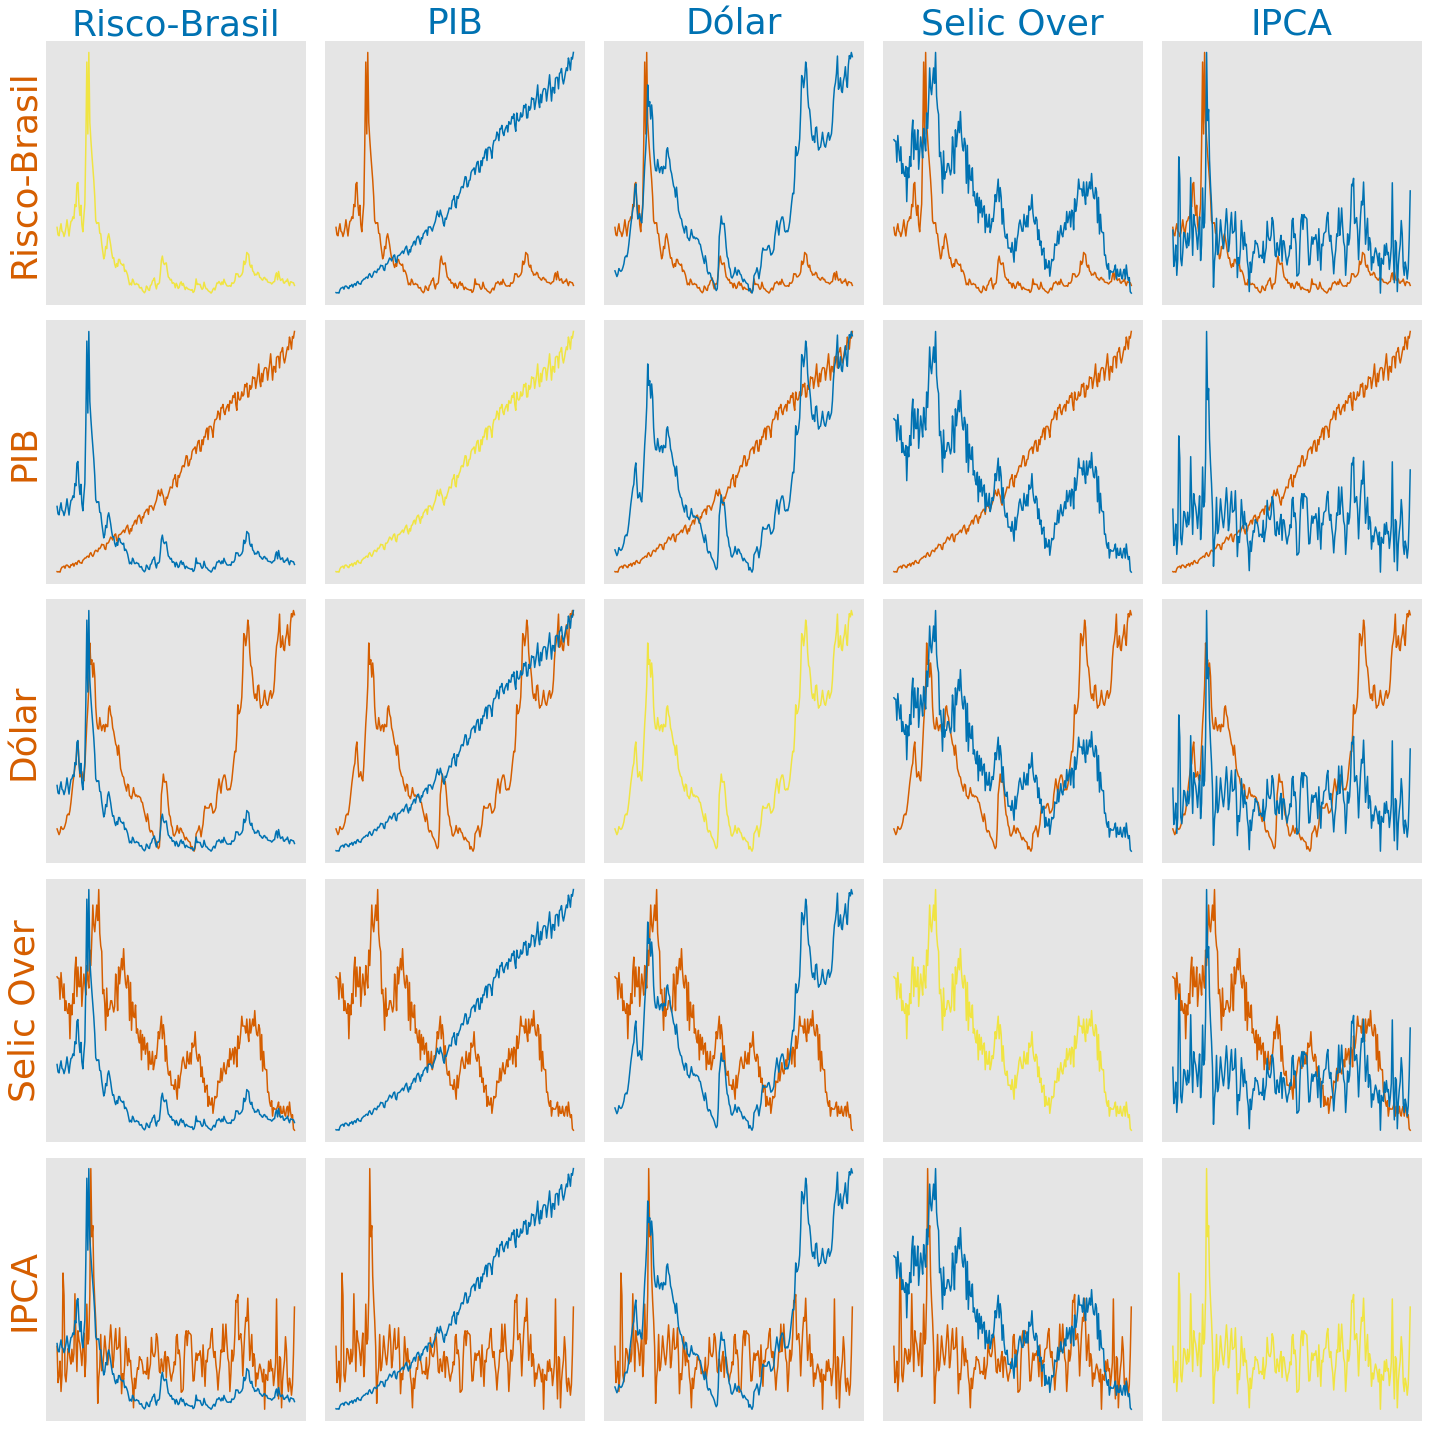

In [4]:
# Criar subplot
n = len(df.columns)
fig, ax = plt.subplots(n, n, figsize=(20,20), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0, wspace=0)

# Navegar entre colunas
for x, colx in enumerate(df.columns):
    for y, coly in enumerate(df.columns):
        
        # Plotar gráficos
        if colx != coly:
            ax[x, y].plot(df.index, df[colx], color='#D55E00')
            ax2 = ax[x, y].twinx()
            ax2.plot(df.index, df[coly], color='#0072B2')
            ax2.axes.get_xaxis().set_visible(False)
            ax2.axes.get_yaxis().set_visible(False)
        else:
            ax[x, y].plot(df.index, df[colx], color='#F0E442')
        
        # Esconder eixos
        ax[x, y].axes.get_xaxis().set_visible(False)
        ax[x, y].axes.get_yaxis().set_ticks([])

# Escrever legendas
for a, col in zip(ax[0], df.columns):
    a.set_title(col, size=36, color='#0072B2')
for a, row in zip(ax[:,0], df.columns):
    a.set_ylabel(row, size=36, color='#D55E00')
    
# Formatar margens
fig.tight_layout()